First 5 rows of the dataset:
        age  gender  hypertension  heart_disease  ever_married  work_type  \
0  0.584961     0.0           0.0            0.0           1.0       0.50   
1  0.182129     0.5           0.0            0.0           0.0       0.50   
2  0.816895     0.0           0.0            0.0           1.0       0.75   
3  0.536133     0.5           0.0            0.0           1.0       0.50   
4  0.169922     0.5           0.0            0.0           0.0       0.00   

        bmi  smoking_status  stroke  
0  0.261168        0.666667       0  
1  0.122566        0.666667       0  
2  0.167239        0.666667       0  
3  0.166094        1.000000       0  
4  0.243986        0.000000       0  

Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7778 entries, 0 to 7777
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             7778 non-null   float64
 1   gender    

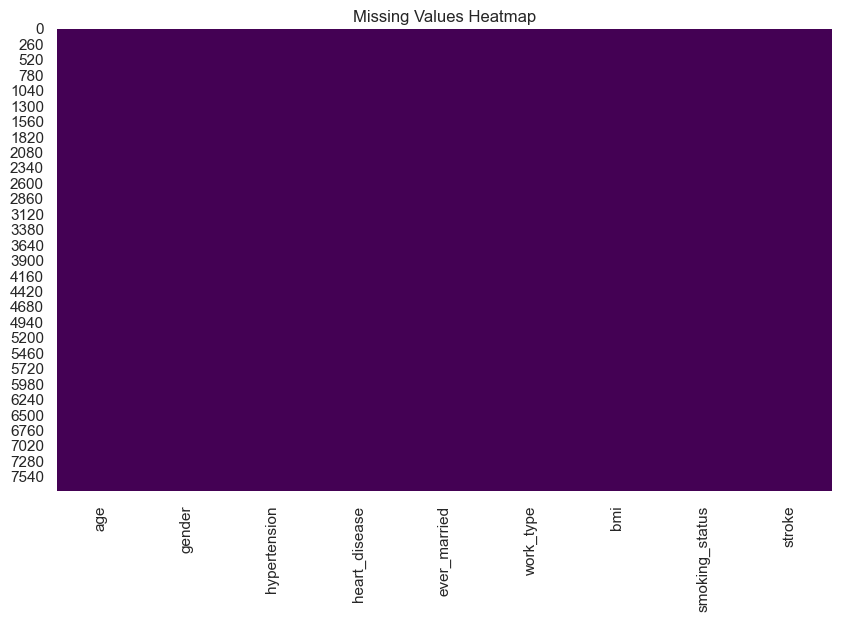

Available columns in the DataFrame:
Index(['age', 'gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'bmi', 'smoking_status', 'stroke'],
      dtype='object')
Some continuous variables are missing from the DataFrame.
Some continuous variables are missing for pairplot.
The following continuous variables are not found in the DataFrame:
['SLEEP_HOURS', 'FRUITS_VEGGIES', 'DAILY_STEPS', 'BMI_RANGE']
Column 'GENDER' not found in the DataFrame.
Column 'AGE' not found in the DataFrame.


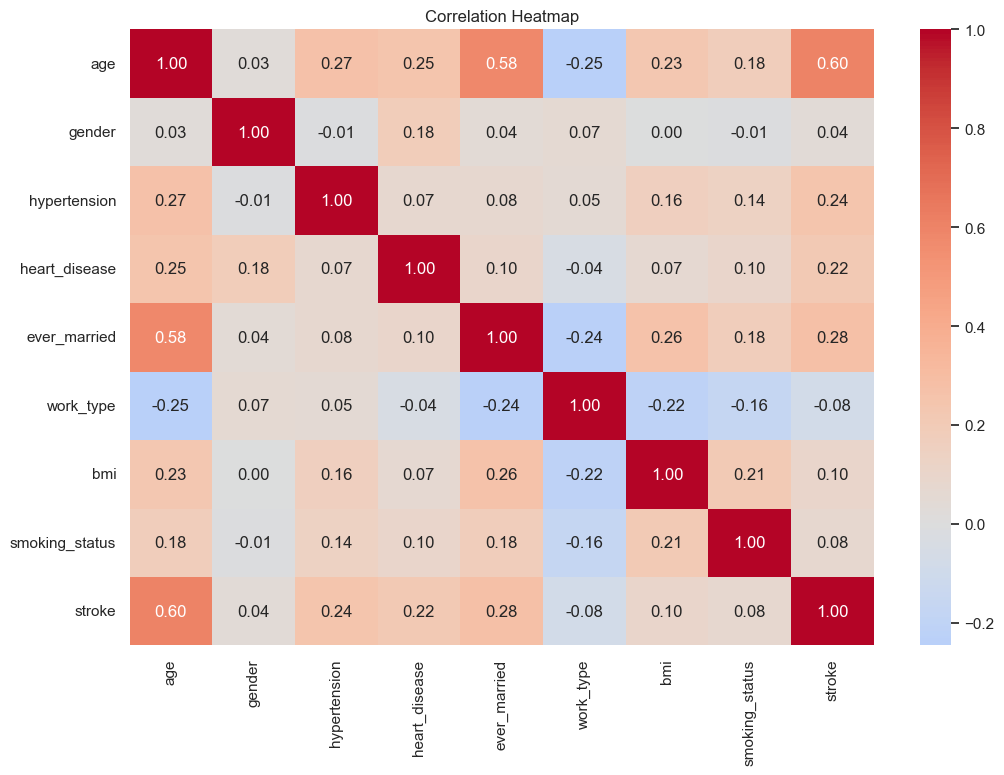

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7778 entries, 0 to 7777
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             7778 non-null   float64
 1   gender          7778 non-null   float64
 2   hypertension    7778 non-null   float64
 3   heart_disease   7778 non-null   float64
 4   ever_married    7778 non-null   float64
 5   work_type       7778 non-null   float64
 6   bmi             7778 non-null   float64
 7   smoking_status  7778 non-null   float64
 8   stroke          7778 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 547.0 KB
Exploratory Data Analysis complete!


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/Users/alvaroquintero/Project/Capstone-Project-Report/Cleaned Data/cleaned_stroke_prediction_dataset.csv'
df = pd.read_csv(file_path)

# Step 1: Understand the structure of the data
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataframe Information:")
print(df.info())

# Step 2: Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Step 3: Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualizing missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Step 4: Print available columns to verify names
print("Available columns in the DataFrame:")
print(df.columns)

# Trim possible leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Step 5: Visualizing distributions of continuous variables
# Define continuous variables (update with column names from your dataset)
continuous_vars = ['SLEEP_HOURS', 'FRUITS_VEGGIES', 'DAILY_STEPS', 'BMI_RANGE']  # Update with actual continuous variable names

# Plot histograms only if all continuous variables are present
if all(var in df.columns for var in continuous_vars):
    df[continuous_vars].hist(bins=15, figsize=(15, 6), layout=(2, 2))
    plt.suptitle('Histograms of Continuous Variables')
    plt.show()
else:
    print("Some continuous variables are missing from the DataFrame.")

# Step 6: Analyzing relationships between variables
if all(var in df.columns for var in continuous_vars):
    plt.figure(figsize=(10, 6))
    sns.pairplot(df[continuous_vars])
    plt.suptitle('Pairplot of Continuous Variables', y=1.02)
    plt.show()
else:
    print("Some continuous variables are missing for pairplot.")

# Check for missing continuous variables
missing_vars = [var for var in continuous_vars if var not in df.columns]
if missing_vars:
    print("The following continuous variables are not found in the DataFrame:")
    print(missing_vars)

# Step 7: Visualizing Categorical Variables
if 'GENDER' in df.columns:  # Check if 'GENDER' column exists
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='GENDER')
    plt.title('Count of Genders')
    plt.show()
else:
    print("Column 'GENDER' not found in the DataFrame.")

# Example: Countplot for age groups (if applicable)
if 'AGE' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='AGE')
    plt.title('Count of Age Groups')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'AGE' not found in the DataFrame.")

# Step 8: Correlation analysis
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Step 9: Save results to a text file (optional)
with open('eda_report.txt', 'w') as f:
    f.write("DataFrame Info:\n")
    f.write(str(df.info()))
    f.write("\n\nSummary Statistics:\n")
    f.write(str(df.describe()))

print("Exploratory Data Analysis complete!")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DAILY_STRESS  389 non-null    float64
 1   AGE           390 non-null    object 
 2   GENDER        390 non-null    object 
 3   SLEEP_HOURS   390 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 12.3+ KB
None
   DAILY_STRESS         AGE  GENDER  SLEEP_HOURS
0           2.0    36 to 50  Female            7
1           3.0    36 to 50  Female            8
2           3.0  51 or more  Female            5
3           1.0  51 or more  Female            7
4           2.0  51 or more  Female            8
DAILY_STRESS    1
AGE             0
GENDER          0
SLEEP_HOURS     0
dtype: int64
        DAILY_STRESS         AGE GENDER  SLEEP_HOURS
count     389.000000         390    390   390.000000
unique           NaN           4      2          NaN
top              NaN  20 or less

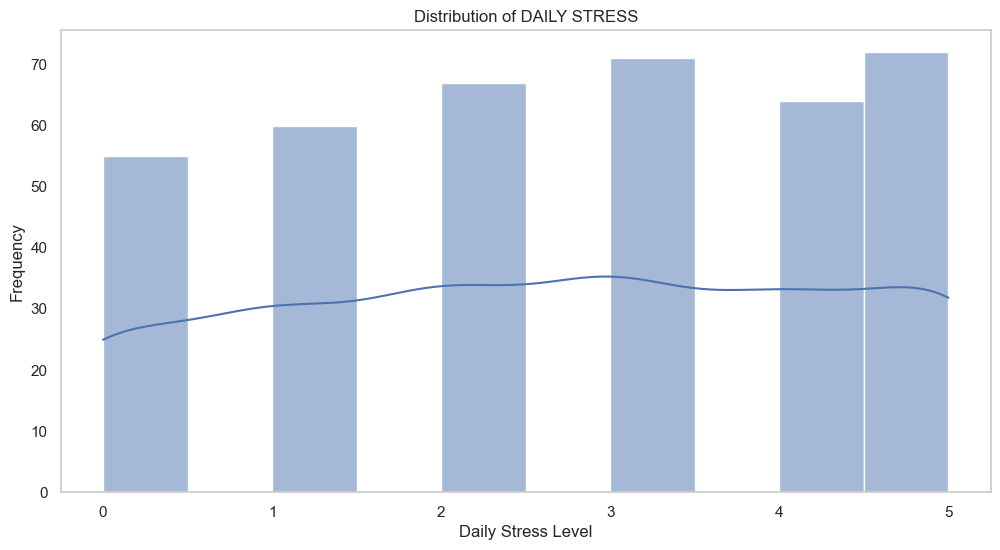

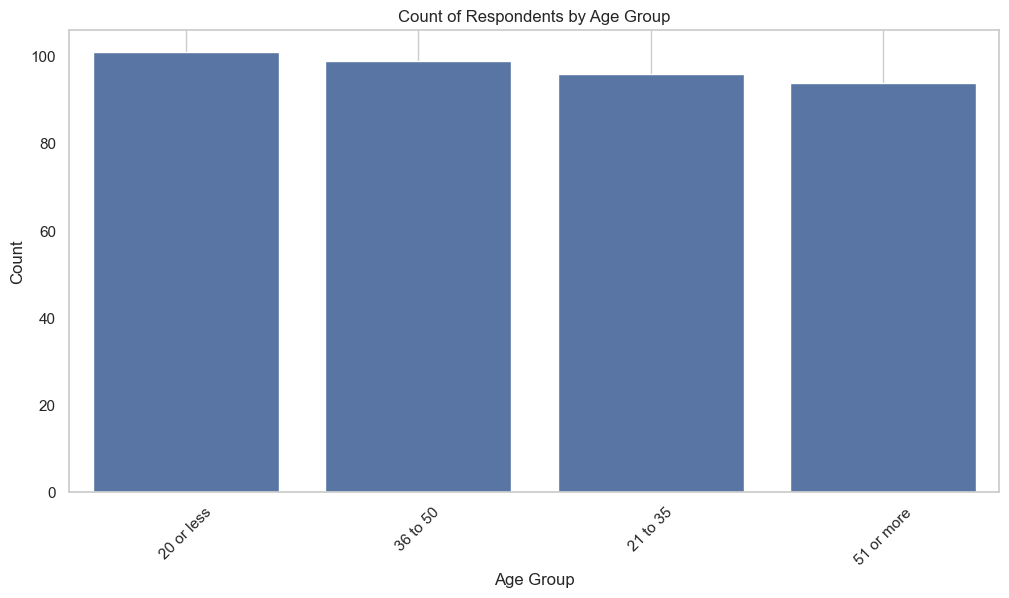

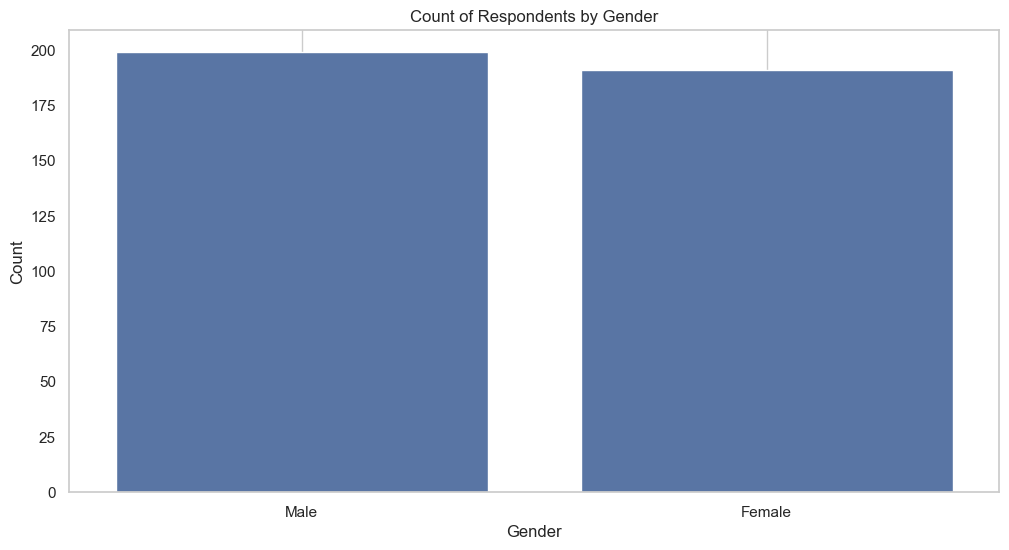

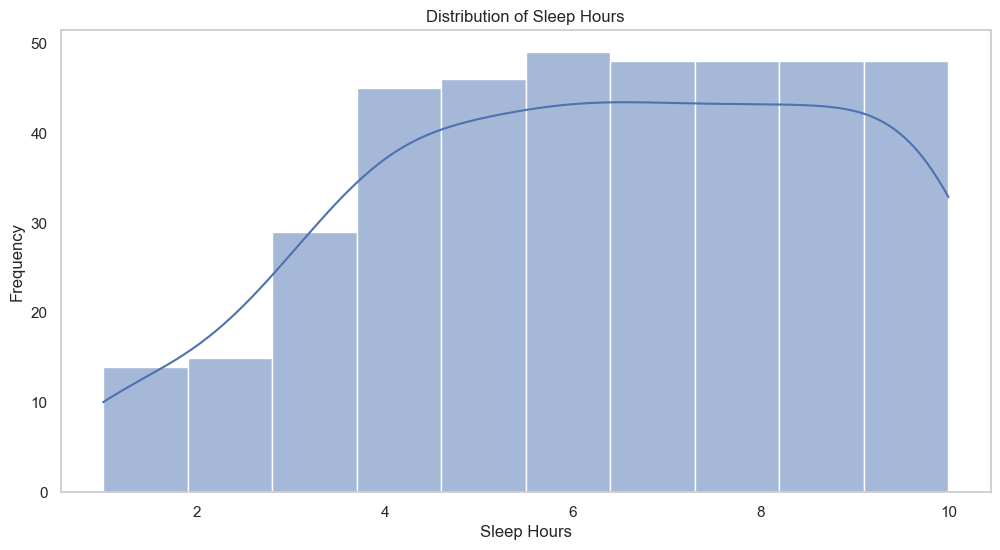

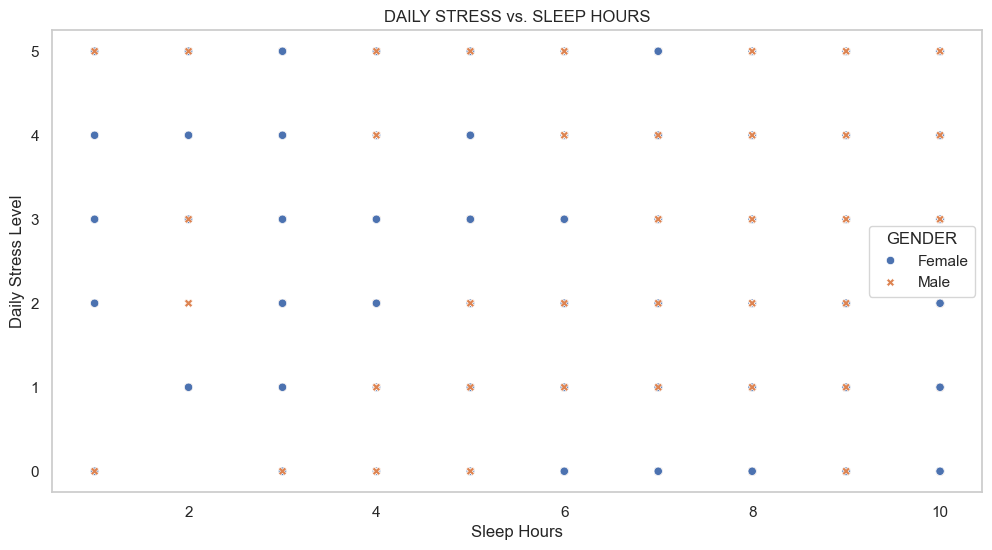

In [7]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the data
file_path = '/Users/alvaroquintero/Project/Capstone-Project-Report/Cleaned Data/cleaned_work_life_balance.csv'  # Change this to your file path
data = pd.read_csv(file_path)

# Step 3: Display the first few rows and basic information
print(data.info())  # Check data types and missing values
print(data.head())  # Display first few rows

# Check for missing values
print(data.isnull().sum())

# Step 4: Generate descriptive statistics
descriptive_stats = data.describe(include='all')
print(descriptive_stats)

# Step 5: Data Visualizations

# Distribution of DAILY_STRESS
plt.figure(figsize=(12, 6))
sns.histplot(data['DAILY_STRESS'], bins=10, kde=True)
plt.title('Distribution of DAILY STRESS')
plt.xlabel('Daily Stress Level')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Count of respondents by AGE group
plt.figure(figsize=(12, 6))
sns.countplot(x='AGE', data=data, order=data['AGE'].value_counts().index)
plt.title('Count of Respondents by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Count of respondents by GENDER
plt.figure(figsize=(12, 6))
sns.countplot(x='GENDER', data=data, order=data['GENDER'].value_counts().index)
plt.title('Count of Respondents by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid()
plt.show()

# Distribution of SLEEP_HOURS
plt.figure(figsize=(12, 6))
sns.histplot(data['SLEEP_HOURS'], bins=10, kde=True)
plt.title('Distribution of Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Scatter plot of DAILY_STRESS vs SLEEP_HOURS
plt.figure(figsize=(12, 6))
sns.scatterplot(x='SLEEP_HOURS', y='DAILY_STRESS', data=data, hue='GENDER', style='GENDER')
plt.title('DAILY STRESS vs. SLEEP HOURS')
plt.xlabel('Sleep Hours')
plt.ylabel('Daily Stress Level')
plt.grid()
plt.show()
